##### Numerical Computation

##### Andrew Pickner

I worked alone on this assignment.

# Find roots using quadratic...

$f(x) = 4x^2 - 3x -3$

I can't lie, I had to google the quadratic formula becuase I couldn't remember if `-b` was included in the denominator or not. It is...

---

And the quadratic formula is:

$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

---

and with our coefficients:

$x = \frac{-(-3) \pm \sqrt{(-3)^2 - 4\cdot(4)\cdot(-3)}}{2\cdot(4)}$

$x = \frac{3 \pm \sqrt{9 + 48}}{8}$

$x = \frac{3 \pm \sqrt{57}}{8}$

$x =  \frac{3 \pm 7.54983443527}{8}$

---

$x_1 = \frac{3 - 7.54983443527}{8} = \frac{-4.54983443527}{8} = \boxed{-0.568729304409}$

$x_2 = \frac{3 + 7.54983443527}{8} = \frac{10.54983443527}{8} = \boxed{1.31872930441}$ 

---

so our roots are:

**x = `-0.568729304409`, `1.31872930441`**

---

# Implement bisection for root finding:

I recognized the algorithm looking quite similar to binary search by cutting the sorted list in half at each iteration. 

I looked at these online resources: [GeeksForGeeks](https://www.geeksforgeeks.org/program-for-bisection-method/) and [Steemit](https://steemit.com/mathematics/@dkmathstats/the-bisection-method-with-python-code). The Steemit resource cites Sauer's textbook, which much of the content on the site looks like Sauer's examples which was a helpful reiteration of the material.

In [1]:
f = lambda x: (4 * (x ** 2)) - (3 * x) - 3

def bisection_rootfinder(f, a, b, ret_list=False):
    if (f(a) * f(b)) >= 0: 
        print("f({}) * f({}) > 0... Choose new a & b".format(a,b)) 
        return
    
    # smaller I make tolerance, 
    # smaller the error I get, 
    # longer the program runs...
    tolerance = 0.000001
    i = 0
    
    l = list()
    while (b-a) > tolerance:
        # calculate our mid point
        c = (a + b) / 2
        l.append(c)
        if f(c) == 0:
            break
        
        # shrink from left
        if (f(c) * f(a)) < 0: 
            b = c 
        # shrink from right
        else: 
            a = c
        
        i += 1
            
    # all for this problem with our current f(x)        
    # tolerance = 0.0000001, correct to 7 sigfigs  
    # tolerance = 0.00000001, correct to 8 sigfigs        
    print("The root is: f({:.5f}) = 0".format(c))
    if ret_list:
        print("It took {} iterations to get this answer...".format(i))
        return c, l
    return c

bisection_rootfinder(f, -1, 0, True)        
bisection_rootfinder(f, 1, 2, True)

The root is: f(-0.56873) = 0
It took 20 iterations to get this answer...
The root is: f(1.31873) = 0
It took 20 iterations to get this answer...


(1.3187284469604492,
 [1.5,
  1.25,
  1.375,
  1.3125,
  1.34375,
  1.328125,
  1.3203125,
  1.31640625,
  1.318359375,
  1.3193359375,
  1.31884765625,
  1.318603515625,
  1.3187255859375,
  1.31878662109375,
  1.318756103515625,
  1.3187408447265625,
  1.3187332153320312,
  1.3187294006347656,
  1.3187274932861328,
  1.3187284469604492])

**Other Tests:**

In [2]:
bisection_rootfinder(f, -1, 1.2)
bisection_rootfinder(f, 0, 2)
bisection_rootfinder(f, -1, 2)

The root is: f(-0.56873) = 0
The root is: f(1.31873) = 0
f(-1) * f(2) > 0... Choose new a & b


# Transform the function `f` into a function `g` for a fixed point problem:

I just used Sauer's textbook to help me answer this problem.

$f(x) = 4x^2 -3x -3$

To use $f(x)$ in a rootfinding context, we must set it equal to zero, and get an x alone on one side like so:

$4x^2 -3x -3 = 0$

$(-1)\cdot4x^2 -3x = (-1)\cdot3$

$-4x^2 + 3x = -3$

$3x = 4x^2-3$

$x = \frac{4x^2-3}{3}$

which I rewrote as: 

$x = \frac{4}{3}x^2 - 1$

---

So, after some considerations, the function `g` that I arrived at above is not convergent. I put in a lot of effort on this one and found **MANY** functions that are acceptable `g`'s besides the fact that they don't converge to both points. Maybe I'm missing something and we don't need to find one that converges to both, but that is what I was trying to do.

Here are some of the other functions `g` that I found:
- $g(x)=4x^2-3x-3$
- $g(x)=\frac{3}{4x-3}$
- $g(x)=\frac{2}{x-1}-3x-1$
- $g(x)=\frac{3}{4x}+\frac{3}{4}$

I even went down the rabbit hole of trying to square root some quantity.

Ultimately, $g(x)=\frac{3}{4x-3}$ converges to one of the zeros, more specifically to `-0.56`, so I will use this `g` moving forward, even though it is not entirely convergent :/

In [3]:
# and just to test my math:
f2 = lambda x: ( (3) / ((4 * x) - 3) )

# relatively close, again it gets closer as we use more sigfigs...
print("{:.20f}".format(f2(-0.568729304409) + 0.568729304409))
print("{:.20f}".format(f2(1.31872930441) - 1.31872930441))

0.00000000000022370994
-0.00000000000383715282


# Implement the fixed point method for rootfinding:

In [4]:
def fixedpoint_rootfinding(g, x0, maxiter, ret_list=False):
    err = 1
    i = 0
    xp = []
    
    tolerance = 0.000001
    while(err >= tolerance and i < maxiter):
        x = g(x0)        # fixed point equation
        err = abs(x0-x) # error at the current step
#         print("x: {}, x0: {}, err: {:.5f}".format(x, x0, abs(x0-x)))
        x0 = x
        xp.append(x0)    # save the solution of the current step
        i += 1
    if ret_list:
        return x, xp
    return x

In [5]:
fixedpoint_rootfinding(f2, -0.5, 15, True)

(-0.5687295412736919,
 [-0.6,
  -0.5555555555555555,
  -0.574468085106383,
  -0.5662650602409638,
  -0.5697940503432495,
  -0.5682704811443433,
  -0.5689272503082614,
  -0.5686439489552657,
  -0.5687661180974664,
  -0.5687134281869453,
  -0.5687361514405368,
  -0.5687263515000546,
  -0.5687305779147228,
  -0.5687287551836079,
  -0.5687295412736919])

So it does in fact converge to our zero: `-0.568729304409`

---

# Error of Bisection and Fixed-Point Methods

The root is: f(-0.56873) = 0
It took 22 iterations to get this answer...
[-0.5, -1.25, -0.875, -0.6875, -0.59375, -0.546875, -0.5703125, -0.55859375, -0.564453125, -0.5673828125, -0.56884765625, -0.568115234375, -0.5684814453125, -0.56866455078125, -0.568756103515625, -0.5687103271484375, -0.5687332153320312, -0.5687217712402344, -0.5687274932861328, -0.568730354309082, -0.5687289237976074, -0.5687296390533447] [0.06872930440900005, -0.681270695591, -0.30627069559099995, -0.11877069559099995, -0.025020695590999953, 0.021854304409000047, -0.0015831955909999529, 0.010135554409000047, 0.004276179409000047, 0.0013464919090000471, -0.00011835184099995288, 0.0006140700340000471, 0.0002478590965000471, 6.475362775004712e-05, -2.6799106624952884e-05, 1.8977260562547116e-05, -3.910923031202884e-06, 7.533168765672116e-06, 1.8111228672346158e-06, -1.0499000819841342e-06, 3.806113926252408e-07, -3.346443446794467e-07]
[-0.6, -0.5555555555555555, -0.574468085106383, -0.5662650602409638, -0.56979405

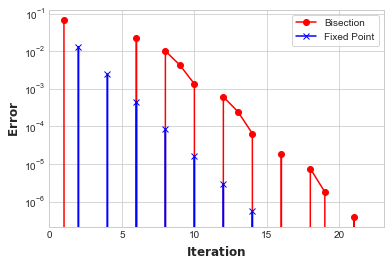

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np

r = -0.568729304409

# -1 and 0 as my interval because it gave me roughly 17 iterations
bs_r, bs_xs = bisection_rootfinder(f, -2, 1, True)

# roughly 12 iterations
fp_r, fp_xs = fixedpoint_rootfinding(f2, -0.5, 15, True)

bs_err = list(map(lambda x: x - r, bs_xs))
print(bs_xs, bs_err)

fp_err = list(map(lambda x: x - r, fp_xs))
print(fp_xs, fp_err)

fig = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel("$\\bf{Iteration}$", fontsize=12)
ax1.set_ylabel("$\\bf{Error}$", fontsize=12)
ax1.set_yscale('log')

bs_iters = [i+1 for i in range(len(bs_err))]
fp_iters = [i+1 for i in range(len(fp_err))]

plt.plot(bs_iters, bs_err, '-o', color='red', label='Bisection')
plt.plot(fp_iters, fp_err, '-x', color='blue', label='Fixed Point')

leg = ax1.legend(loc='upper right', frameon=True)

I spent a solid hour and a half trying to figure out how to get this to work properly and it barely looks even *close* to your plot so I gave up. 